In [1]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')

2023-08-24 10:21:48.846833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-24 10:21:48.846860: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#to see length of training dataset
len(x_train)

60000

In [4]:
#to see length of testing dataset
len(x_test)

10000

In [5]:
x_train[18]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  34, 169, 250,  40,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  58, 242, 221, 143,  17,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 247, 143,  10,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

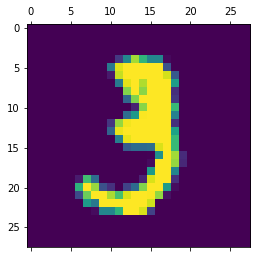

In [6]:
#to see how first image look
plt.matshow(x_train[10])

In [7]:

#normalize the images by scaling pixel intensities to the range 0,1

x_train = x_train / 255
x_test = x_test / 255

In [8]:
#Define the network architecture using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2023-08-24 10:21:51.931468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-24 10:21:51.931504: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-24 10:21:51.931532: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sl114-Veriton-M200-H81): /proc/driver/nvidia/version does not exist
2023-08-24 10:21:51.931728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
 # Train the model
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6374 - accuracy: 0.8390 - val_loss: 0.3534 - val_accuracy: 0.9026
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3342 - accuracy: 0.9072 - val_loss: 0.2908 - val_accuracy: 0.9185
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2862 - accuracy: 0.9192 - val_loss: 0.2592 - val_accuracy: 0.9278
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2565 - accuracy: 0.9269 - val_loss: 0.2380 - val_accuracy: 0.9324
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2339 - accuracy: 0.9341 - val_loss: 0.2184 - val_accuracy: 0.9381
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2159 - accuracy: 0.9393 - val_loss: 0.2043 - val_accuracy: 0.9434
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2006 - accuracy: 0.9441 - val_loss: 0.1928 - val_accuracy:

In [12]:
# Evaluate the model

test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 941us/step - loss: 0.1653 - accuracy: 0.9519
Loss=0.165
Accuracy=0.952


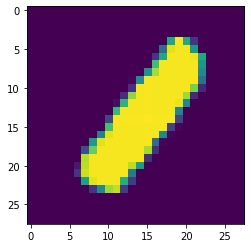

In [13]:
# Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [14]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 0s 771us/step
Handwritten number in the image is= 8


In [15]:
# Plot graph for Accuracy and Loss
get_ipython().run_line_magic('pinfo2', 'history.history')

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

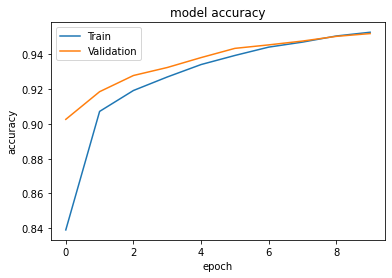

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

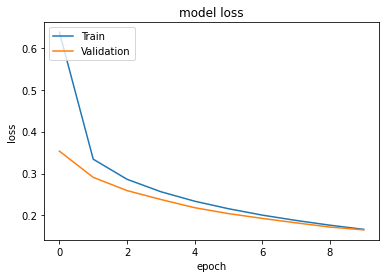

In [18]:
# graph representing the model’s accuracy

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


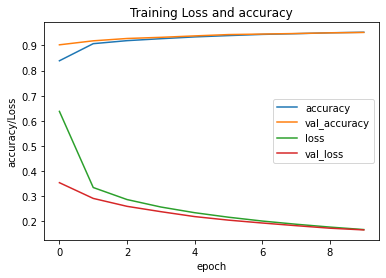

In [19]:
# graph represents the model’s loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()


In [20]:
pwd

'/home/sl1-14/Desktop/Ashish_'

In [21]:
# Save the model
keras_model_path='/home/sl1-14/Desktop/Ashish_'
model.save(keras_model_path)

INFO:tensorflow:Assets written to: /home/sl1-14/Desktop/Ashish_/assets


In [22]:
#use the save model
restored_keras_model = tf.keras.models.load_model(keras_model_path)